<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import warnings
import plotly.express as px
import requests
import plotly.io as pio
from bs4 import BeautifulSoup

In [2]:
# Use only one of the following lines:

# Display interactive graphs
# pio.renderers.default = 'plotly_mimetype+notebook'

# Display image of graphs for correct displaying on GitHub 
pio.renderers.default = 'png'

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Set your DB сonnection options here
DBNAME = 'xxxxxxxxxxxx'
USER = 'xxxxxxxxxxxx'
PASSWORD = 'xxxxxxxxxxxx'
HOST = 'xxxxxxxxxxxx'
PORT = 'xxxxxxxxxxxx'

In [5]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [6]:
query_3_1 = f'''
    SELECT
        COUNT(id) total_vacancies
    FROM public.vacancies
'''

In [7]:
total_vacancies = pd.read_sql_query(query_3_1, connection)
print('Всего вакансий в базе:', total_vacancies.iloc[0, 0])

Всего вакансий в базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [8]:
query_3_2 = f'''
    SELECT
        COUNT(id) total_employers
    FROM public.employers
'''

In [9]:
total_employers = pd.read_sql_query(query_3_2, connection)
print('Всего работодателей в базе:', total_employers.iloc[0, 0])

Всего работодателей в базе: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [10]:
query_3_3 = f'''
    SELECT
        COUNT(id) total_areas
    FROM public.areas
'''

In [11]:
total_areas = pd.read_sql_query(query_3_3, connection)
print('Всего регионов в базе:', total_areas.iloc[0, 0])

Всего регионов в базе: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [12]:
query_3_4 = f'''
    SELECT
        COUNT(id) total_industries
    FROM public.industries
'''

In [13]:
total_industries = pd.read_sql_query(query_3_4, connection)
print('Всего сфер деятельности в базе:', total_industries.iloc[0, 0])

Всего сфер деятельности в базе: 294


***

Количество вакансий примерно в 2 раза больше, чем количество работодателей, что свидетельствует о том, что многие работодатели публикуют более одной вакансии.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [14]:
n = 5
query_4_1 = f'''
    SELECT
        a.name area,
        COUNT(a.name) cnt
    FROM
        public.areas a
        JOIN public.vacancies v ON a.id = v.area_id
    GROUP BY a.name 
    ORDER BY COUNT(a.name) DESC
    LIMIT {n}
'''

In [15]:
areas_count = pd.read_sql_query(query_4_1, connection)
display(areas_count)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [16]:
query_4_2 = f'''
    SELECT
        COUNT(id)
    FROM public.vacancies
    WHERE
        salary_from IS NOT NULL
        OR salary_to IS NOT NULL
'''

In [17]:
not_null_salary = pd.read_sql_query(query_4_2, connection)
print('Количество вакансий, у которых хотя бы одно из полей зарплаты заполнено:', not_null_salary.iloc[0, 0])

Количество вакансий, у которых хотя бы одно из полей зарплаты заполнено: 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [18]:
query_4_3 = f'''
    SELECT
        AVG(salary_from) low,
        AVG(salary_to) high
    FROM public.vacancies
'''

In [19]:
avg_salary = pd.read_sql_query(query_4_3, connection)
print(
    'Среднее значение нижней границы зарплатной вилки: ', round(avg_salary.iloc[0, 0]), '\n',
    'Среднее значение верхней границы зарплатной вилки: ', round(avg_salary.iloc[0, 1]), '\n',
    sep='', end=''
)

Среднее значение нижней границы зарплатной вилки: 71065
Среднее значение верхней границы зарплатной вилки: 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [20]:
query_4_4 = f'''
    SELECT
        schedule,
        employment,
        COUNT(schedule)
    FROM public.vacancies
    GROUP BY schedule, employment
    ORDER BY COUNT(schedule) DESC
'''

In [21]:
schedule_employment = pd.read_sql_query(query_4_4, connection)
display(schedule_employment)

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [22]:
query_4_5 = f'''
    SELECT
        experience,
        COUNT(experience)
    FROM public.vacancies
    GROUP BY experience
    ORDER BY COUNT(experience)
'''

In [23]:
exp_rate = pd.read_sql_query(query_4_5, connection)
display(exp_rate)

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

* Примерно в половине вакансий оба поля с зарплатой пустые. Если нам будет необходимо прогнозировать ЗП, то половина данных сразу же отсеивается, что может ухудшить точность прогнозируемой ЗП.
* Средняя зарплата варьируется в диапазоне от 71 065 руб. до 110 537 руб.
* Топ-2 самых непопулярных пар *график - занятость*:
    1. Сменный график - Проектная работа
    2. Вахтовый метод - Проектная работа

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
n = 5
query_5_1 = f'''
    SELECT
        e.name,
        COUNT(e.name)
    FROM
        public.vacancies v
        JOIN public.employers e ON e.id = v.employer_id
    GROUP BY e.name
    ORDER BY COUNT(e.name) DESC
    LIMIT {n}
'''

In [25]:
top_five_employers = pd.read_sql_query(query_5_1, connection)
display(top_five_employers)

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
query_5_2 = f'''
    SELECT
        a.name,
        COUNT(v.id) vacancies,
        COUNT(e.id) employers
    FROM
        public.areas a
        LEFT JOIN public.employers e ON e.area = a.id
        LEFT JOIN public.vacancies v ON v.area_id = a.id
    WHERE v.id IS NULL
    GROUP BY a.name
    ORDER BY employers DESC
'''

In [27]:
areas_without_vacancies = pd.read_sql_query(query_5_2, connection)
display(areas_without_vacancies)

,name,vacancies,employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
query_5_3 = f'''
    SELECT
        e.name,
        COUNT(DISTINCT v.area_id)
    FROM
        public.employers e
        JOIN public.vacancies v ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY count DESC 
'''

In [29]:
employer_areas_count = pd.read_sql_query(query_5_3, connection)
display(employer_areas_count)

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
query_5_4 = f'''
    SELECT
        COUNT(*)
    FROM
        public.employers e
        LEFT JOIN public.employers_industries ei ON ei.employer_id = e.id
        LEFT JOIN public.industries i ON ei.industry_id = i.id
    WHERE i.name IS NULL
'''

In [31]:
employer_null_industries = pd.read_sql_query(query_5_4, connection)
print('Количество работодателей, у которых не указана сфера деятельности:', employer_null_industries.iloc[0, 0])

Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
n = 3
query_5_5 = f'''
    SELECT
        e.name,
        COUNT(i.id)
    FROM
        public.employers e
        LEFT JOIN public.employers_industries ei ON ei.employer_id = e.id
        LEFT JOIN public.industries i ON ei.industry_id = i.id
    WHERE i.name IS NOT NULL
    GROUP BY e.name
    HAVING COUNT(i.id) = 4
    ORDER BY name
    LIMIT {n}
'''

In [33]:
employer_four_industries = pd.read_sql_query(query_5_5, connection)
print('Первые 3 компании(в алфавитном порядке), у которых указано 4 сферы деятельности:')
display(employer_four_industries)

Первые 3 компании(в алфавитном порядке), у которых указано 4 сферы деятельности:


,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
query_5_6 = f'''
    SELECT
        COUNT(*)
    FROM
        public.employers e
        JOIN public.employers_industries ei ON e.id = ei.employer_id
        JOIN public.industries i ON i.id = ei.industry_id
    WHERE i.name = 'Разработка программного обеспечения'
'''

In [35]:
employers_devs = pd.read_sql_query(query_5_6, connection)
print('Количество компаний, занимающихся разработкой ПО:', employers_devs.iloc[0, 0])

Количество компаний, занимающихся разработкой ПО: 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
cities = []
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')

# Find a first table on page with class 'standard sortable' to get table with necessary cities
table = page.find('table', class_='standard sortable')

# Iterate table rows
for x in table.find_all('tr'):
    # Add all unpacked text from tag 'a' to list
    cities.append(x.find('a').text)

# Make a tuple from list to add in SQL query
# 1-st element is column name which we don't need
cities = tuple(cities[1:])

In [37]:
employer_vacancy_area = '''
    public.employers e
    LEFT JOIN public.vacancies v ON e.id = v.employer_id
    LEFT JOIN public.areas a ON a.id = v.area_id
'''
yandex_filter = f'''
    e.name = 'Яндекс' AND a.name IN {cities}
'''
query_5_7 = f'''
    SELECT
        a.name,
        COUNT(a.name) cnt
    FROM {employer_vacancy_area}
    WHERE {yandex_filter}
    GROUP BY a.name
    
    UNION ALL
    
    SELECT
        'total', count(*)
    FROM {employer_vacancy_area}
    WHERE {yandex_filter}
    
    ORDER BY cnt
'''

In [38]:
yandex_top = pd.read_sql_query(query_5_7, connection)
display(yandex_top)

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

* Топ-1 работодатель по количеству вакансий и разнообразию регионов - Яндекс
* 36% работодателей не указывают сферы деятельности.
* 15% работодателей занимаются разработкой ПО.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [39]:
query_6_1 = f'''
    SELECT
        COUNT(id)
    FROM
        public.vacancies
    WHERE
        lower(name) LIKE '%data%'
        OR lower(name) LIKE '%данн%'
'''

In [40]:
data_vacancies = pd.read_sql_query(query_6_1, connection)
print('Количество вакансий, имеющих отношение к данным:', data_vacancies.iloc[0, 0])

Количество вакансий, имеющих отношение к данным: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [41]:
ds_filter = '''
    (lower(vacancies.name) LIKE '%data scientist%'
    OR lower(vacancies.name) LIKE '%data science%'
    OR lower(vacancies.name) LIKE '%исследователь данных%'
    OR (vacancies.name LIKE '%ML%' and lower(vacancies.name) NOT LIKE '%html%')
    OR lower(vacancies.name) LIKE '%machine learning%'
    OR lower(vacancies.name) LIKE '%машинн%обучен%')
'''
query_6_2 = f'''
    SELECT
        COUNT(id)
    FROM
        public.vacancies
    WHERE
        {ds_filter}
        AND
        (lower(name) LIKE '%junior%'
        OR lower(experience) LIKE '%нет опыта%'
        OR lower(employment) LIKE '%стажировка%')
'''

In [42]:
ds_vacancies_junior = pd.read_sql_query(query_6_2, connection)
print('Количество подходящих вакансий для начинающего дата-сайентиста:', ds_vacancies_junior.iloc[0, 0])

Количество подходящих вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [43]:
query_6_3 = f'''
    SELECT
        COUNT(id)
    FROM
        public.vacancies
    WHERE
        {ds_filter}
        AND
        (key_skills LIKE '%SQL%'
        OR lower(key_skills) LIKE '%postgres%')
'''

In [44]:
ds_sql = pd.read_sql_query(query_6_3, connection)
print('Количество вакансий, в которых ключевым навыком является SQL или postgres:', ds_sql.iloc[0, 0])

Количество вакансий, в которых ключевым навыком является SQL или postgres: 201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [45]:
query_6_4 = f'''
    SELECT
        COUNT(id)
    FROM
        public.vacancies
    WHERE
        {ds_filter}
        AND
        lower(key_skills) LIKE '%python%'
'''

In [46]:
ds_python = pd.read_sql_query(query_6_4, connection)
print('Количество вакансий, в которых ключевым навыком является Python:', ds_python.iloc[0, 0])

Количество вакансий, в которых ключевым навыком является Python: 351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [47]:
query_6_5 = f'''
    SELECT
        key_skills
    FROM
        public.vacancies
    WHERE
        {ds_filter}
'''

In [48]:
ds_skills = pd.read_sql_query(query_6_5, connection)
not_null_mask = ds_skills['key_skills'].notnull()
skills_len = ds_skills[not_null_mask]['key_skills'].apply(lambda x: len(str(x).split('\t')))
skills_mean = round(skills_len.mean(), 2)
print(f'В среднем в вакансиях для DS указывают {skills_mean} ключевых навыков')

В среднем в вакансиях для DS указывают 6.41 ключевых навыков


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [49]:
query_6_6 = f'''
    WITH exp_salary AS (
        SELECT
            experience,
            COALESCE(salary_to, 0) + COALESCE(salary_from, 0) salary
        FROM
            public.vacancies
        WHERE
            {ds_filter}
            AND(
                (salary_from IS NOT NULL AND salary_to IS NULL)
                OR (salary_from IS NULL AND salary_to IS NOT NULL)
            )
        
        UNION ALL
    
        SELECT
            experience,
            (salary_to + salary_from) / 2
        FROM
            public.vacancies
        WHERE
            {ds_filter}
            AND(salary_from IS NOT NULL
                AND salary_to IS NOT NULL)
    )
    SELECT
        es.experience,
        AVG(es.salary) average_salary
    FROM exp_salary es
    GROUP BY es.experience
'''

In [50]:
mean_salary = pd.read_sql_query(query_6_6, connection)
display(mean_salary)

,experience,average_salary
0,От 3 до 6 лет,243114.666667
1,От 1 года до 3 лет,139674.750000
2,Нет опыта,74642.857143


***

In [51]:
data_vacancies_count = str(round(data_vacancies.iloc[0, 0] / total_vacancies.iloc[0, 0] * 100, 2)) + '%'
junior_ds_count = str(round(ds_vacancies_junior.iloc[0, 0] / total_vacancies.iloc[0, 0] * 100, 2)) + '%'
print(
    f'''Процент вакансий, в которых требуются навыки работы с данными: {data_vacancies_count}
Процент подходящих для DS junior-специалиста вакансий: {junior_ds_count}'''
)

Процент вакансий, в которых требуются навыки работы с данными: 3.6%
Процент подходящих для DS junior-специалиста вакансий: 0.1%


* Владение Python указано в вакансиях для DS чаще, чем владение SQL/postgres. Однако, вероятнее всего, это не означает, что SQL/postgres ценятся меньше, потому что вакансия работы с данными подразумевает навыки работы с базами данных, и некоторые работодатели просто не указывают в вакансии это, но на собеседовании потребуют.
* В среднем указывают 6 ключевых навыков в вакансиях, это означает, что необходимо разбираться как минимум в шести разных инструментах/библиотеках, когда претендуешь на должность, а так же уметь объединять логику между ними, например, интеграция SQL через Python с помощью pandas.
* Для junior DS-специалиста без опыта в среднем предлагаемая ЗП - 74 000 руб., что свидетельствует о том, что это направление очень востребовано и перспективно.
* Хоть процент подходящих вакансий для junior DS-специалиста без опыта довольно низок, это не означает, что их действительно настолько мало. Многие работодатели не указывают ключевые слова "junior, без опыта, стажировка", хотя при этом всегда могут рассматривать перспективных специалистов без опыта, если те имеют достаточно знаний.

# Общий вывод по проекту

Напишем запрос к БД, чтобы получить все вакансии для DS с полным набором информации как о самих вакансиях, так и о работодателях, сферах деятельности и регионах для каждой вакансии.

In [52]:
full_ds_query = f'''
    SELECT
        vacancies.id,
        vacancies.name "Должность",
        vacancies.key_skills "Ключевые навыки",
        vacancies.schedule "График",
        vacancies.experience "Опыт",
        vacancies.employment "Занятость",
        vacancies.salary_from "ЗП(от)",
        vacancies.salary_to "ЗП(до)",
        a.name "Регион",
        e.name "Работодатель",
        i.name "Сферы деятельности"
    FROM
        public.vacancies vacancies
        LEFT JOIN public.areas a ON vacancies.area_id = a.id
        LEFT JOIN public.employers e ON vacancies.employer_id = e.id
        LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
        LEFT JOIN public.industries i ON ei.industry_id = i.id
    WHERE
        {ds_filter}
'''

Посмотрим на датафрейм для всех Data Science вакансий.

In [53]:
full_ds_vacancies = pd.read_sql_query(full_ds_query, connection)
full_ds_vacancies.head()

,id,Должность,Ключевые навыки,График,Опыт,Занятость,ЗП(от),ЗП(до),Регион,Работодатель,Сферы деятельности
0,50533416,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,NaN,Новосибирск,Технологика,"Системная интеграция, автоматизации технологи..."
1,50533416,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,NaN,Новосибирск,Технологика,Разработка программного обеспечения
2,54824572,Data Scientist,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,Алматы,Мобайл Телеком-Сервис (Объединенная Компания T...,Мобильная связь
3,54825318,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,Полный день,От 1 года до 3 лет,Полная занятость,50000.0,70000.0,Пермь,Випакс+,Разработка программного обеспечения
4,54825318,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,Полный день,От 1 года до 3 лет,Полная занятость,50000.0,70000.0,Пермь,Випакс+,"Промышленное, бытовое электрооборудование и эл..."


Уберём табуляцию в ключевых навыках.

In [54]:
full_ds_vacancies['Ключевые навыки'] = full_ds_vacancies['Ключевые навыки'].apply(lambda skills: str(skills).replace('\t', ', '))
full_ds_vacancies['Ключевые навыки'].head()

0            Python, SQL, Работа в команде, OpenCV, ML
1            Python, SQL, Работа в команде, OpenCV, ML
2    Oracle Pl/SQL, Базы данных, Machine Learning, ...
3    Python, OpenCV, Tensorflow, Computer Vision, Н...
4    Python, OpenCV, Tensorflow, Computer Vision, Н...
Name: Ключевые навыки, dtype: object

Посмотрим, какие ключевые навыки более востребованы.

In [55]:
key_skills = {}

def count_skills(skills:str):
    for skill in skills.split(', '):
        # On previous step we could take None's as string
        if skill not in key_skills.keys() and skill != 'None':
            key_skills[skill] = 1
        elif skill != 'None':
            key_skills[skill] += 1

# Fill key_skills dict by (skill: count) scheme
full_ds_vacancies['Ключевые навыки'].apply(count_skills)
# Series is easier to process data instead of dict
key_skills_series = pd.Series(key_skills)
print('Количество различных ключевых навыков:', key_skills_series.shape[0])

Количество различных ключевых навыков: 431


Слишком много различных ключевых навыков, выделим топ-10 самых популярных и построим график по этому топ-10.

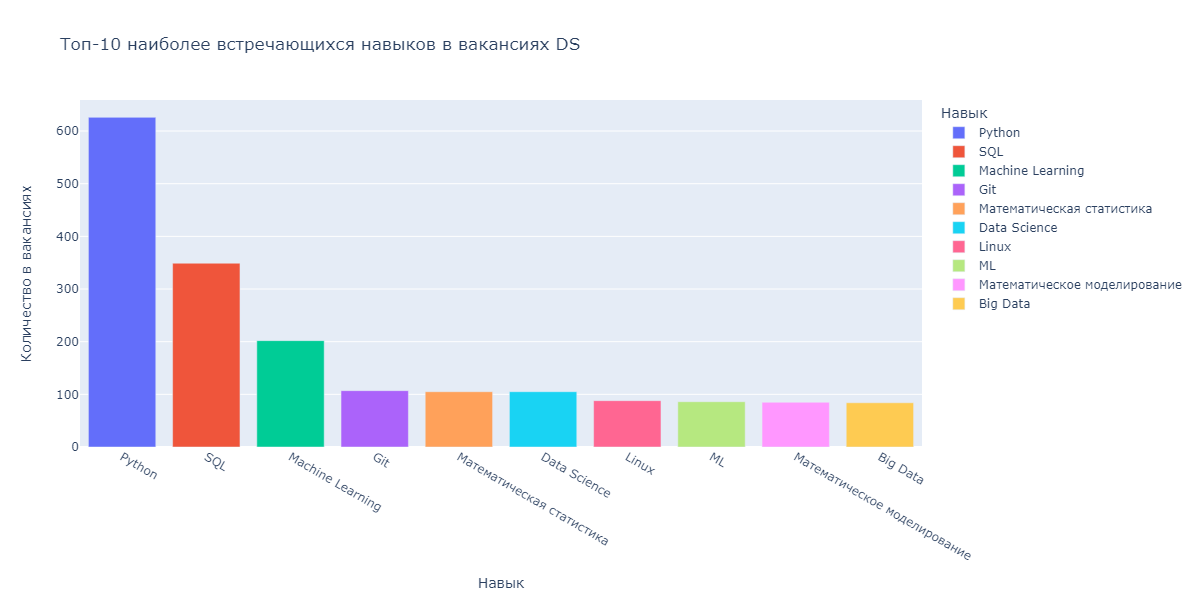

In [56]:
key_skills_top = key_skills_series.sort_values(ascending=False)[:10]
key_skills_bar = px.bar(
    key_skills_top,
    color=key_skills_top.index,
    labels={'index': 'Навык', 'value': 'Количество в вакансиях'},
    title='Топ-10 наиболее встречающихся навыков в вакансиях DS',
    width=1200,
    height=600
)
key_skills_bar.show()

Из графика можем сделать следующий вывод:
* Кроме владения Python, SQL и Machine Learning необходимо ещё отлично знать математическую статистику, Git, математическое моделирование, а также иметь навыки работы с OS Linux.

Посмотрим на распределение по опыту среди вакансий DS.

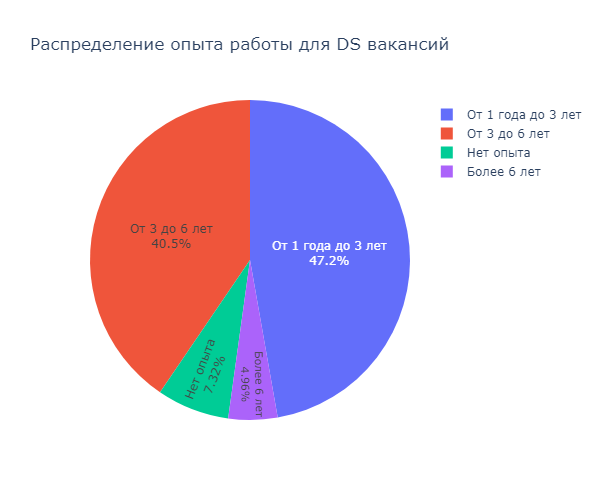

In [57]:
exp_rate_bar = px.pie(
    full_ds_vacancies.sort_values(by='Опыт'),
    names='Опыт',
    width=600,
    height=500,
    title='Распределение опыта работы для DS вакансий'
)
exp_rate_bar.update_traces(textposition='inside', textinfo='percent+label')

Сгруппируем медианную(менее подвержена разбросу значений) ЗП по опыту работы.

In [58]:
# Delete rows with more than 2 empty columns
without_na = full_ds_vacancies.dropna(axis=0, thresh=full_ds_vacancies.columns.shape[0]-2)
grouped_exp_salary = without_na.groupby('Опыт')[['ЗП(от)', 'ЗП(до)']].median().sort_values(by='Опыт')
display(grouped_exp_salary)

,ЗП(от),ЗП(до)
Опыт,,
Более 6 лет,NaN,NaN
Нет опыта,60000.0,100000.0
От 1 года до 3 лет,100000.0,146456.0
От 3 до 6 лет,200000.0,292242.0


Из сгруппированной таблицы можем наблюдать, что для вакансий, в которых требуемый опыт более 6 лет, не указываются зп. Вероятно, дело в том, что суммы уже договорные и сильно зависят от навыков соискателя.

Построим график, иллюстрирующий темп роста средней ЗП (между нижней и верхней вилками) с ростом опыта соискателя

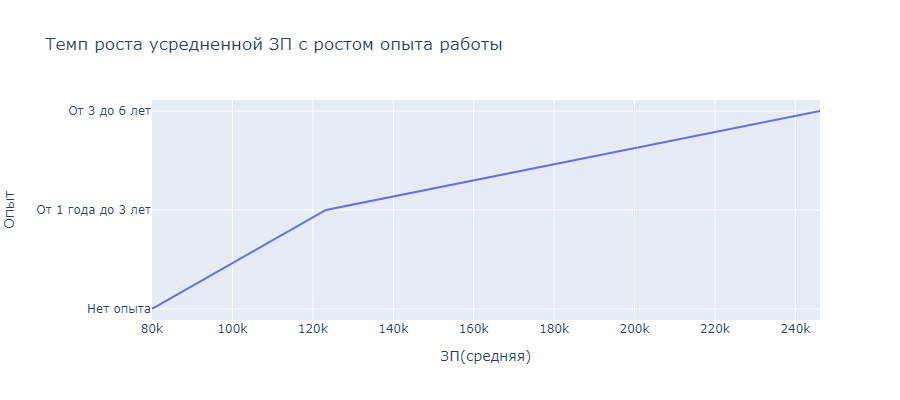

In [59]:
mean_salary_by_exp = grouped_exp_salary.dropna()
mean_salary_by_exp['ЗП(средняя)'] = (mean_salary_by_exp['ЗП(от)'] + mean_salary_by_exp['ЗП(до)']) / 2
salary_growth_rate = px.line(
    mean_salary_by_exp,
    x='ЗП(средняя)',
    title='Темп роста усредненной ЗП с ростом опыта работы',
    width=900,
    height=400
)
salary_growth_rate.show()

Из графика можем наблюдать, что самый наибольший темп роста - в первые 1-3 года, когда специалист растёт из junior в middle.

## Итоги

* DS-вакансий от работодателей достаточно, чтобы каждый специалист с достаточным уровнем знаний нашёл для себя работу.
* DS - набирающая популярность профессия, т.к. хоть вакансий пока в процентном соотношении не так много, как хотелось бы, но зарплаты говорят о том, что компании готовы немало платить хорошим специалистам по данной профессии.
* Полагаю, в ближайшие 2-3 года количество вакансий сильно возрастет, т.к. всё больше и больше компаний увидят в том, что машинное обучение и нейросети могут приумножить прибыль.
* Напротив высокой ЗП стоят и высокие требования к hard-skills соискателя, необходимо хорошо углубить свои знания в таких аспектах, как:
    1. Python
    2. SQL
    3. Machine Learning
    4. Math statistics
    5. Git
    6. Linux
